<h1>Импорт библиотек

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.testing import assert_array_equal

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [40]:
def sum_prod(X, V):
    result = np.zeros_like(V[0])
    
    for i in range(len(X)):
        result = result + X[i] @ V[i]
    
    return result

def tests():
    X1 = [np.array([[1, 0], [0, 1]]), np.array([[2, 0], [0, 2]])]
    V1 = [np.array([[1], [1]]), np.array([[1], [1]])]
    assert_array_equal(sum_prod(X1, V1), np.array([[3], [3]]))

    X2 = [np.array([[1, 2], [3, 4]])]
    V2 = [np.array([[1], [0]])]
    assert_array_equal(sum_prod(X2, V2), np.array([[1], [3]]))

    print('Test result: SUCCESS')

tests()

Test result: SUCCESS


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [41]:
def binarize(M, threshold):
    return (M > threshold).astype(int)

def tests():
    M1 = np.array([[0.1, 0.6, 0.2],
                   [0.7, 0.3, 0.8],
                   [0.4, 0.9, 0.5]])
    assert_array_equal(binarize(M1, 0.5), np.array([[0, 1, 0],
                                                    [1, 0, 1],
                                                    [0, 1, 0]]))

    M2 = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
    assert_array_equal(binarize(M2, 4), np.array([[0, 0, 0],
                                                  [0, 1, 1],
                                                  [1, 1, 1]]))

    print('Test result: SUCCESS')

tests()

Test result: SUCCESS


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [42]:
def unique_rows(mat):
    return [np.unique(row).tolist() for row in mat]

def unique_columns(mat):
    return [np.unique(col).tolist() for col in mat.T]

def tests():
    M1 = np.array([[1, 2, 2, 3],
                   [4, 4, 5, 6],
                   [7, 8, 8, 8]])
    assert unique_rows(M1) == [[1, 2, 3], [4, 5, 6], [7, 8]]
    assert unique_columns(M1) == [[1, 4, 7], [2, 4, 8], [2, 5, 8], [3, 6, 8]]

    M2 = np.array([[1, 1, 1],
                   [1, 2, 3],
                   [4, 5, 5]])
    assert unique_rows(M2) == [[1], [1, 2, 3], [4, 5]]
    assert unique_columns(M2) == [[1, 4], [1, 2, 5], [1, 3, 5]]

    print('Test result: SUCCESS')

tests()

Test result: SUCCESS


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Матрица:
[[ 0.06265052 -0.28232461  0.2123556 ]
 [-1.00339291  0.52008643 -0.09022405]
 [ 0.14770378 -0.65804707 -0.16761573]
 [ 1.65011273  0.03647226 -1.79395699]]

Статистика по столбцам:
Столбец 1: мат. ожидание = 0.214, дисперсия = 0.893
Столбец 2: мат. ожидание = -0.096, дисперсия = 0.187
Столбец 3: мат. ожидание = -0.460, дисперсия = 0.613

Статистика по строкам:
Строка 1: мат. ожидание = -0.002, дисперсия = 0.043
Строка 2: мат. ожидание = -0.191, дисперсия = 0.392
Строка 3: мат. ожидание = -0.226, дисперсия = 0.110
Строка 4: мат. ожидание = -0.036, дисперсия = 1.980


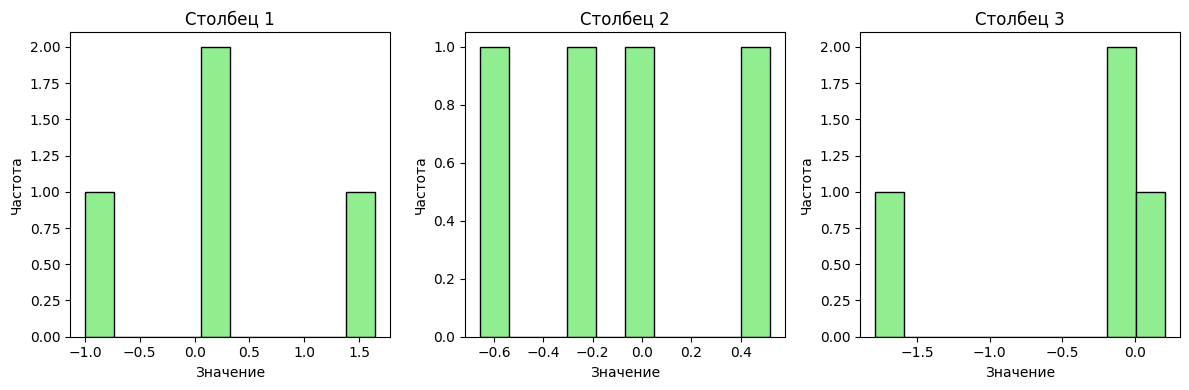

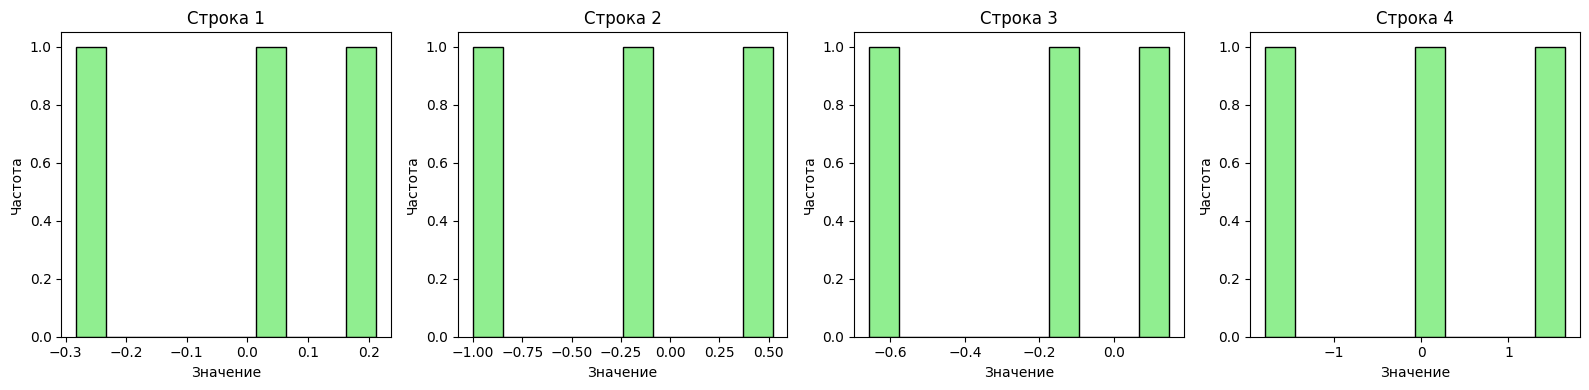

In [45]:
def analyze_matrix(m, n):
    matrix = np.random.randn(m, n)
    
    print('Матрица:')
    print(matrix)
    
    print('\nСтатистика по столбцам:')
    for i in range(n):
        col = matrix[:, i]
        mean = np.mean(col)
        var = np.var(col)
        print(f'Столбец {i + 1}: мат. ожидание = {mean:.3f}, дисперсия = {var:.3f}')
    
    print('\nСтатистика по строкам:')
    for i in range(m):
        row = matrix[i, :]
        mean = np.mean(row)
        var = np.var(row)
        print(f'Строка {i + 1}: мат. ожидание = {mean:.3f}, дисперсия = {var:.3f}')
    
    fig, axes = plt.subplots(1, n, figsize=(4*n, 4))
    if n == 1:
        axes = [axes]
    for i in range(n):
        axes[i].hist(matrix[:, i], bins=10, edgecolor='black', color='lightgreen')
        axes[i].set_title(f'Столбец {i + 1}')
        axes[i].set_xlabel('Значение')
        axes[i].set_ylabel('Частота')
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(1, m, figsize=(4*m, 4))
    if m == 1:
        axes = [axes]
    for i in range(m):
        axes[i].hist(matrix[i, :], bins=10, edgecolor='black', color='lightgreen')
        axes[i].set_title(f'Строка {i + 1}')
        axes[i].set_xlabel('Значение')
        axes[i].set_ylabel('Частота')
    plt.tight_layout()
    plt.show()

analyze_matrix(4, 3)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [43]:
def chess(m, n, a, b):
    matrix = np.full((m, n), a)
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 1:
                matrix[i, j] = b
    return matrix

def tests():
    assert_array_equal(chess(4, 4, 0, 1), np.array([[0, 1, 0, 1],
                                                    [1, 0, 1, 0],
                                                    [0, 1, 0, 1],
                                                    [1, 0, 1, 0]]))
    
    assert_array_equal(chess(5, 5, 1, 3), np.array([[1, 3, 1, 3, 1],
                                                    [3, 1, 3, 1, 3],
                                                    [1, 3, 1, 3, 1],
                                                    [3, 1, 3, 1, 3],
                                                    [1, 3, 1, 3, 1]]))
    
    assert_array_equal(chess(3, 6, 5, 2), np.array([[5, 2, 5, 2, 5, 2,],
                                                    [2, 5, 2, 5, 2, 5],
                                                    [5, 2, 5, 2, 5, 2]]))

    print('Test result: SUCCESS')

tests()

Test result: SUCCESS


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

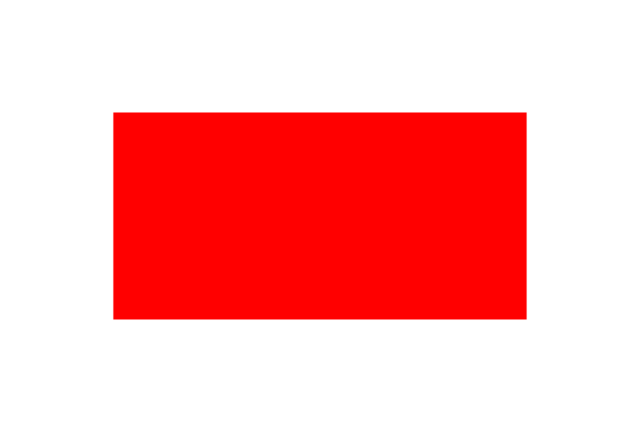

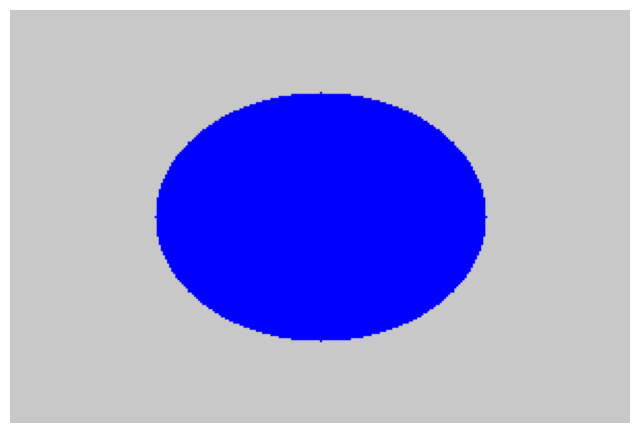

In [46]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.ones((m, n, 3)) * background_color
    
    y0, x0 = m // 2, n // 2
    y_start = max(0, y0 - b // 2)
    y_end = min(m, y0 + b // 2)
    x_start = max(0, x0 - a // 2)
    x_end = min(n, x0 + a // 2)
    
    image[y_start:y_end, x_start:x_end] = rectangle_color
    
    plt.figure(figsize=(8, 6))
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.ones((m, n, 3)) * background_color
    
    y0, x0 = m // 2, n // 2
    y, x = np.ogrid[:m, :n]
    mask = ((x - x0)**2 / a**2 + (y - y0)**2 / b**2) <= 1
    
    image[mask] = ellipse_color
    
    plt.figure(figsize=(8, 6))
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    plt.show()

# Прямоугольник: 200x100 на холсте 200x300, красный на белом фоне
draw_rectangle(200, 100, 200, 300, [255, 0, 0], [255, 255, 255])

# Эллипс: полуоси 80x60 на холсте 200x300, синий на сером фоне
draw_ellipse(80, 60, 200, 300, [0, 0, 255], [200, 200, 200])

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Математическое ожидание: 5.400
Дисперсия: 5.973
СКО (стандартное отклонение): 2.444

Локальные максимумы: [(1, 5.0), (3, 8.0), (5, 9.0), (7, 7.0), (9, 6.0), (11, 8.0), (13, 10.0)]
Локальные минимумы: [(2, 3.0), (4, 4.0), (6, 2.0), (8, 5.0), (10, 3.0), (12, 4.0)]

Скользящее среднее (окно=3): [3.33333333 5.33333333 5.         7.         5.         6.
 4.66666667 6.         4.66666667 5.66666667 5.         7.33333333
 6.33333333]


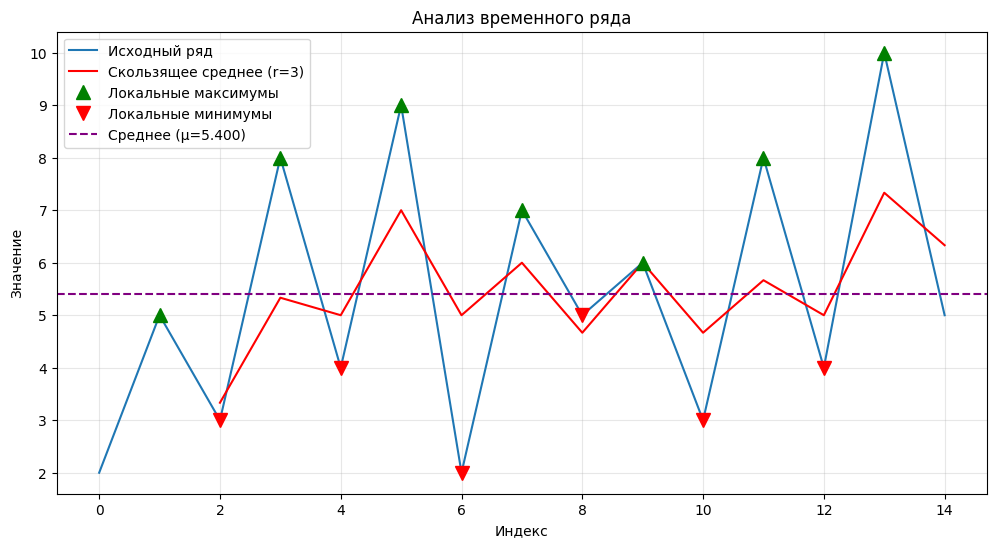

Математическое ожидание: -0.000
Дисперсия: 0.490
СКО (стандартное отклонение): 0.700

Локальные максимумы: [(6, 0.9994862162006879), (31, 0.9953791129491982)]
Локальные минимумы: [(18, -0.9953791129491981), (43, -0.9994862162006879)]

Скользящее среднее (окно=5): [ 0.45903949  0.65077306  0.79993939  0.89678146  0.93496481  0.91199186
  0.82936527  0.69248967  0.51031813  0.29476654  0.05993419 -0.17881847
 -0.40587456 -0.60638229 -0.76722638 -0.87788599 -0.93112284 -0.92345468
 -0.85538311 -0.73136068 -0.55949976 -0.3510418  -0.11962211  0.11962211
  0.3510418   0.55949976  0.73136068  0.85538311  0.92345468  0.93112284
  0.87788599  0.76722638  0.60638229  0.40587456  0.17881847 -0.05993419
 -0.29476654 -0.51031813 -0.69248967 -0.82936527 -0.91199186 -0.93496481
 -0.89678146 -0.79993939 -0.65077306 -0.45903949]


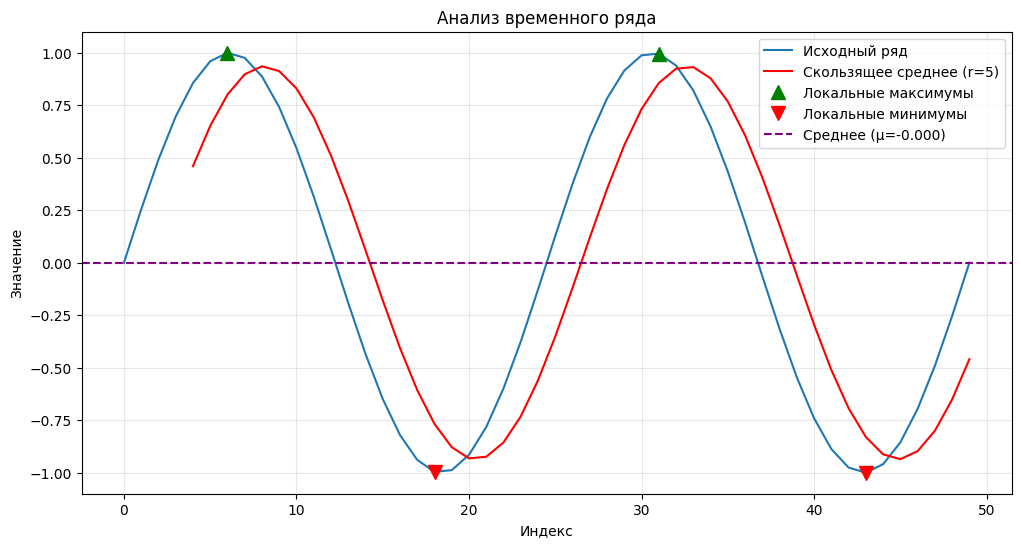

In [34]:
def analyze_timeseries(data, p):
    data = np.array(data)
    mean = np.mean(data)
    variance = np.var(data)
    
    std = np.std(data)
    
    local_max = []
    local_min = []
    
    for i in range(1, len(data) - 1):
        if data[i] > data[i-1] and data[i] > data[i+1]:
            local_max.append((i, float(data[i])))
        elif data[i] < data[i-1] and data[i] < data[i+1]:
            local_min.append((i, float(data[i])))
    
    moving_avg = np.convolve(data, np.ones(p)/p, mode='valid')
    
    print(f'Математическое ожидание: {mean:.3f}')
    print(f'Дисперсия: {variance:.3f}')
    print(f'СКО (стандартное отклонение): {std:.3f}')
    print(f'\nЛокальные максимумы: {local_max}')
    print(f'Локальные минимумы: {local_min}')
    print(f'\nСкользящее среднее (окно={p}): {moving_avg}')
    
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Исходный ряд')
    plt.plot(range(p-1, len(data)), moving_avg, label=f'Скользящее среднее (r={p})', color='red')
    
    if local_max:
        max_indices, max_values = zip(*local_max)
        plt.plot(max_indices, max_values, 'g^', markersize=10, label='Локальные максимумы')
    
    if local_min:
        min_indices, min_values = zip(*local_min)
        plt.plot(min_indices, min_values, 'rv', markersize=10, label='Локальные минимумы')
    
    plt.axhline(y=mean, color='purple', linestyle='--', label=f'Среднее (μ={mean:.3f})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.title('Анализ временного ряда')
    plt.show()

data = [2, 5, 3, 8, 4, 9, 2, 7, 5, 6, 3, 8, 4, 10, 5]
results = analyze_timeseries(data, 3)

data2 = np.sin(np.linspace(0, 4*np.pi, 50))
results2 = analyze_timeseries(data2, 5)

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [44]:
def one_hot_encoding(vector):
    num_classes = int(np.max(vector)) + 1
    result = np.zeros((len(vector), num_classes), dtype=int)
    
    for i, label in enumerate(vector):
        result[i, int(label)] = 1
    
    return result

def tests():
    v1 = np.array([0, 2, 3, 0])
    assert_array_equal(one_hot_encoding(v1), np.array([[1, 0, 0, 0],
                                                       [0, 0, 1, 0],
                                                       [0, 0, 0, 1],
                                                       [1, 0, 0, 0]]))
    
    v2 = np.array([1, 0, 2, 1, 0])
    assert_array_equal(one_hot_encoding(v2), np.array([[0, 1, 0],
                                                       [1, 0, 0],
                                                       [0, 0, 1],
                                                       [0, 1, 0],
                                                       [1, 0, 0]]))
    
    v3 = np.array([0, 0, 0, 1, 1, 2])
    assert_array_equal(one_hot_encoding(v3), np.array([[1, 0, 0],
                                                       [1, 0, 0],
                                                       [1, 0, 0],
                                                       [0, 1, 0],
                                                       [0, 1, 0],
                                                       [0, 0, 1]]))

    print('Test result: SUCCESS')

tests()

Test result: SUCCESS
